### Problem 1: The K Means Clustering Method
(a)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from collections import Counter


def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b), axis=1)

def chebyshev_distance(a, b):
    return np.max(np.abs(a - b), axis=1)


iris = load_iris()
x = iris.data
y_true = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


def k_means(x, K, distance_metric='euclidean', max_iters=100):
    np.random.seed(42)
    centroids = x[np.random.choice(range(len(x)), K, replace=False)]
    
    for _ in range(max_iters):
        if distance_metric == 'euclidean':
            distances = np.array([euclidean_distance(x, centroid) for centroid in centroids])
        elif distance_metric == 'manhattan':
            distances = np.array([manhattan_distance(x, centroid) for centroid in centroids])
        elif distance_metric == 'chebyshev':
            distances = np.array([chebyshev_distance(x, centroid) for centroid in centroids])
        
        cluster_labels = np.argmin(distances, axis=0)
        
        new_centroids = np.array([x[cluster_labels == k].mean(axis=0) for k in range(K)])
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return cluster_labels, centroids

<div style="page-break-after: always;"></div>
(b) & (c) combined

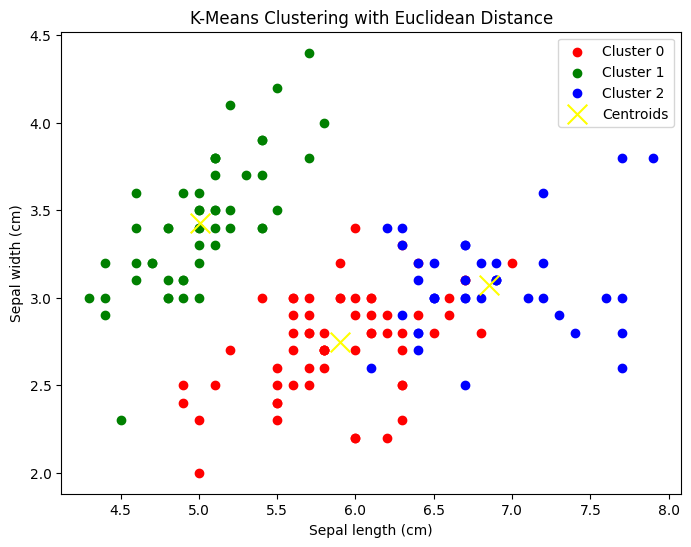

Accuracy with Euclidean distance: 0.8933


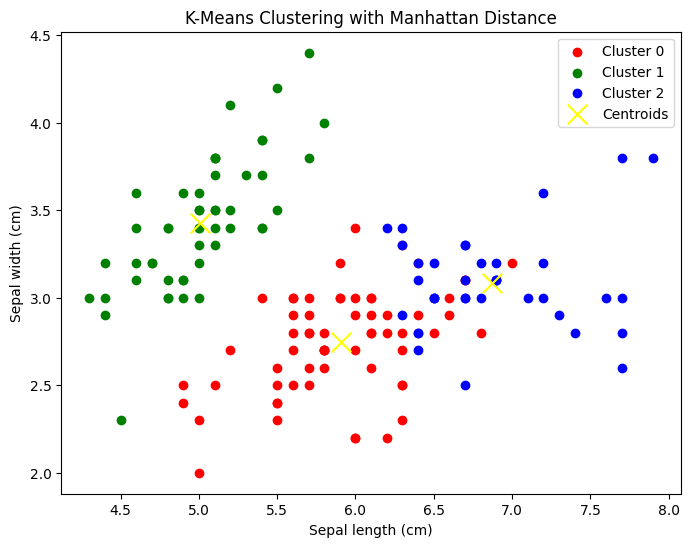

Accuracy with Manhattan distance: 0.8867


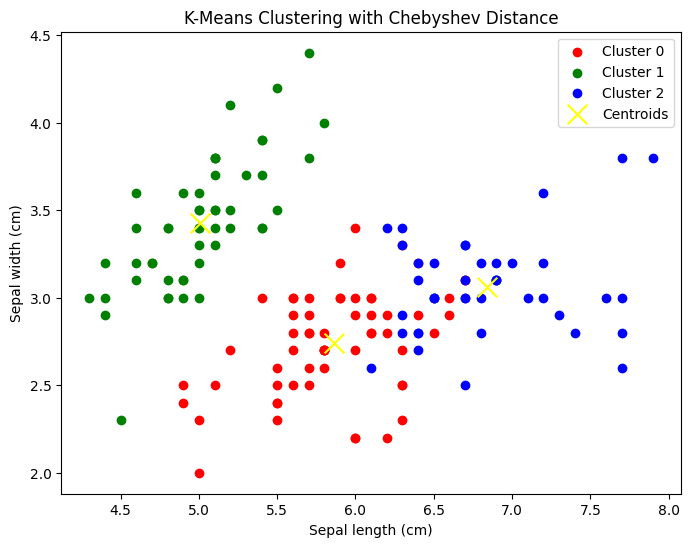

Accuracy with Chebyshev distance: 0.8867


In [ ]:
K = 3
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

for metric in distance_metrics:
    cluster_labels, centroids = k_means(x, K, distance_metric=metric)
    
    # Visualization on the first two features
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for k in range(K):
        cluster = x[cluster_labels == k]
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[k], label=f'Cluster {k}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='x', label='Centroids')
    plt.title(f'K-Means Clustering with {metric.capitalize()} Distance')
    plt.xlabel(feature_names[0].capitalize())
    plt.ylabel(feature_names[1].capitalize())
    plt.legend()
    plt.show()
    
    # Evaluate accuracy
    # Map cluster labels to true labels
    label_mapping = {}
    for k in range(K):
        true_labels = y_true[cluster_labels == k]
        if len(true_labels) == 0:
            continue
        most_common = Counter(true_labels).most_common(1)[0][0]
        label_mapping[k] = most_common
    predicted_labels = np.array([label_mapping[label] for label in cluster_labels])
    accuracy = np.mean(predicted_labels == y_true)
    print(f'Accuracy with {metric.capitalize()} distance: {accuracy:.4f}')

<div style="page-break-after: always;"></div>

### Problem 2: The PCA Method

Explained variance ratio (first two components): [0.92461872 0.05306648]


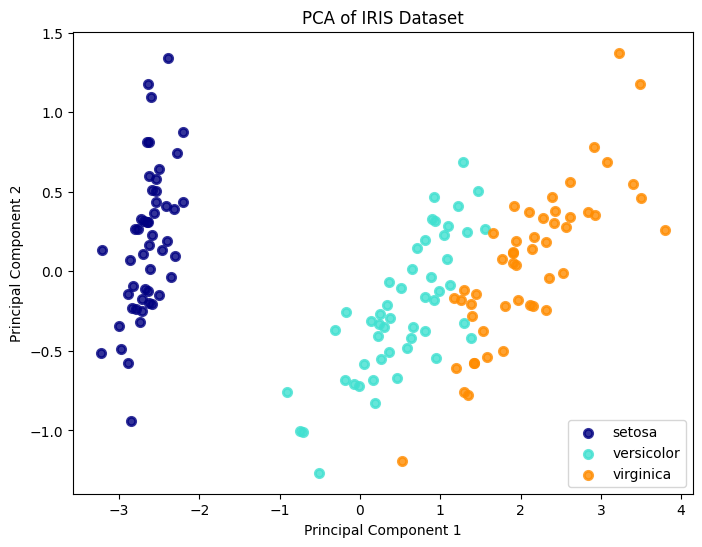

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the IRIS dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# PCA transformation
pca = PCA(n_components=2)
x_r = pca.fit_transform(x)

# Print explained variance ratio
print("Explained variance ratio (first two components):", pca.explained_variance_ratio_)

# Plot PCA result
plt.figure(figsize=(8, 6))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        x_r[y == i, 0],
        x_r[y == i, 1],
        color=color,
        alpha=0.8,
        lw=lw,
        label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()